In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras # Don't import keras from tensorflow like (from tensorflow import keras)
import seaborn as sns

## Classification using Multi-layer perceptron on Fashion-MNIST dataset.
Fashion MNIST dataset holds 70,000 clothing images. Images value are stored in CSV files (train size: 60,000, test size: 10,000).  
First column holds a number which is mapped to a particular cloth, other 784 columns hold corresponding pixel values.  
0	T-shirt/top  
1	Trouser  
2	Pullover  
3	Dress  
4	Coat  
5	Sandal  
6	Shirt  
7	Sneaker  
8	Bag  
9	Ankle boot

In [21]:
# Reading train and test data
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

In [22]:
# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [23]:
# Making validation data out of test data
val_data = test_data.iloc[:5000,:]
test_data = test_data.iloc[5000:,:]

In [24]:
# Fetching the labels
train_labels = train_data.label
val_labels = val_data.label
test_labels = test_data.label

In [25]:
# Reshaping training data
train_images = train_data.iloc[:,1:].values.reshape(60000, 28, 28)
train_images.shape

(60000, 28, 28)

In [26]:
# Reshaping validation data
val_images = val_data.iloc[:,1:].values.reshape(5000, 28, 28)
val_images.shape

(5000, 28, 28)

In [27]:
# Reshaping test data
test_images = test_data.iloc[:,1:].values.reshape(5000, 28, 28)
test_images.shape

(5000, 28, 28)

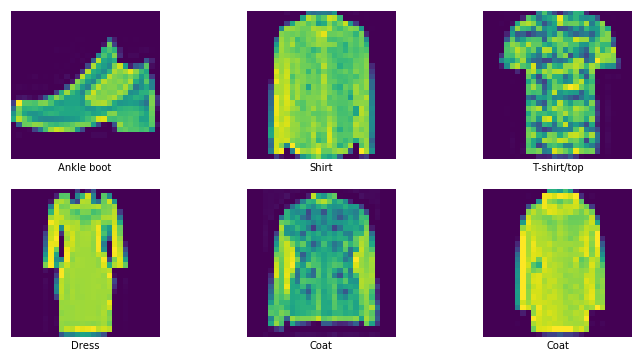

In [28]:
# Confirming if given data is labelled correctly by plotting images against their label names
plt.figure(figsize=(12,6))
for i in range(1,7):
    ax1 = plt.subplot(2,3,i)
    ax1.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.xticks([]) # removing xticks
    plt.yticks([]) # removing yticks    
    sns.despine(left=True, bottom=True) # removing borders
# Inference - Given data is correct. 

In [29]:
# Finding pixel range values for all the images
print(pd.unique([np.ptp(i) for i in train_images]))
print(pd.unique([np.ptp(i) for i in test_images]))
# Inference - Only values are 255 and 254 which means that color in all images fall in the range of 0-255.

[255 254]
[254 255]


In [30]:
# Scaling data in the range of 0-1
train_images = train_images/255.0
val_images = val_images/255.0
test_images = test_images/255.0

In [31]:
# Defining multi-layer perceptron model with 1 hidden layer having 256 neurons and output layer with 10 possible answers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Perform conversion of higher dimensional data (here, 2-D) to 1-D data.
    keras.layers.Dense(256, activation=tf.nn.relu), # Hidden layer with 256 neurons and ReLU activation function
    keras.layers.Dense(10, activation=tf.nn.softmax) # Output layer with softmax activation function 
])                                                   # which gives final output in terms of probability. 

#### Prefer Average Cross Entropy over Classification error or MSE. Refer [here](https://jamesmccaffrey.wordpress.com/2013/11/05/why-you-should-use-cross-entropy-error-instead-of-classification-error-or-mean-squared-error-for-neural-network-classifier-training/) for more explanation.

In [32]:
# Defining parameters like optmizer, loss function and evaluating metric
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(), # Learning rate and momentum can be passed inside optimizer
              metrics=['accuracy'])

In [40]:
# Traning the model and writing log file for TensorBoard

logdir = r'MLP'
cpfile = r'MLP_checkpoint.hdf5' # Weights to be stored in HDF5 format

# To store tensorboard graph logs
cb_tensorboard = keras.callbacks.TensorBoard(log_dir=logdir, write_graph=True) 

# To store model checkpoint every time validation accuracy improves. You can assign different metrics to monitor like -
# acc: Train accuracy
# val_acc: Validation accuracy
# loss: Train loss
# val_loss: Validation loss
cb_checkpoint = keras.callbacks.ModelCheckpoint(cpfile, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

epochs = 5
history = model.fit(train_images, train_labels, epochs=epochs, 
                   validation_data=(val_images, val_labels),
                   callbacks=[cb_tensorboard, cb_checkpoint])

Train on 60000 samples, validate on 5000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 182us/step - loss: 0.2192 - acc: 0.9178 - val_loss: 0.3097 - val_acc: 0.8850

Epoch 00001: val_acc improved from -inf to 0.88500, saving model to MLP_checkpoint.hdf5
Epoch 2/5
60000/60000 [==============================] - 11s 182us/step - loss: 0.2156 - acc: 0.9188 - val_loss: 0.3002 - val_acc: 0.8940

Epoch 00002: val_acc improved from 0.88500 to 0.89400, saving model to MLP_checkpoint.hdf5
Epoch 3/5
60000/60000 [==============================] - 12s 193us/step - loss: 0.2083 - acc: 0.9225 - val_loss: 0.3030 - val_acc: 0.8946

Epoch 00003: val_acc improved from 0.89400 to 0.89460, saving model to MLP_checkpoint.hdf5
Epoch 4/5
60000/60000 [==============================] - 11s 186us/step - loss: 0.2005 - acc: 0.9248 - val_loss: 0.3121 - val_acc: 0.8916

Epoch 00004: val_acc did not improve
Epoch 5/5
60000/60000 [==============================] - 12s 196us/step - loss: 0.1931 -

In [41]:
# Next time we can directly load the checkpoint model without waiting for model to train
model.load_weights("MLP_checkpoint.hdf5")

In [42]:
# Evaluating the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

5000/5000 [==============================] - 0s 67us/step
Test accuracy: 0.8992


In [36]:
# Prediction
predictions = model.predict(test_images)

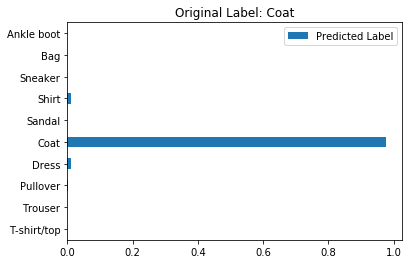

Original Label: Coat
Predicted Label: Coat


In [37]:
# Visualizing the probability against target classes

instance = 500 # choose an index out of the available 5000 test images 
out = pd.DataFrame(predictions[instance], index=class_names, columns=['Predicted Label'])
out.plot.barh()
plt.title('Original Label: '+class_names[test_labels.iloc[instance]])
plt.show()

print('Original Label: '+ class_names[test_labels.iloc[instance]])
print('Predicted Label: ' + class_names[np.argmax(predictions[instance])]) # Predicted class with highest probability

In [38]:
# Save model to disk
model.save('model.h5')

# Load model from the disk
loaded_model = keras.models.load_model('model.h5')